# **BUSI 488 / COMP 488 Data Science in the Business World**
## *Spring 2023*  
Daniel M. Ringel  
Kenan-Flagler Business School  
*The University of North Carolina at Chapel Hill*  
dmr@unc.edu

## Class 08 - Dimensionality Reduction
*February 2, 2023*  
Version 1.6



## Today's Agenda


**1. Dimension and Dimensionality Reduction**  
**2. Principle Component Analysis**   
**3. t-Stochastic Neighborhood Embedding**  


## Prep-Check:


# Machine Learning
![Overview Machine Learning](https://www.cognub.com/wp-content/uploads/2016/02/1.png)
*Source: COGNUB 2016*



# 1. Dimension and Dimensionality Reduction
In the last notebook, we started to see data as rows of numbers, aka vectors. 
* Class16 showed ways to measure distance and similarity between two rows/vectors, and applied it to **Clustering**.  Recall that 
   * A distance measure, such as [Euclidean ($L_2$) distance](https://en.wikipedia.org/wiki/Euclidean_distance) $d(p,q)=\sqrt{(p-q)\cdot(p-q)}$, has values from $[0,\infty]$, where identical rows/vectors have distance $d(p,p)=0$, and
   * A similarity measure, such as [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s(p,q)=\frac{p\cdot q}{|p|\cdot|q|}$, has values from $[-1,1]$ or $[0,1]$, where identical rows/vectors have similarity $s(p,p)=1$.

Data collection and conversion processes give us a lot of numbers, but which are the most important?  In this notebook we'll explore the concept of dimension, which is simply the number of numbers in a row, and **Dimension Reduction** techniques, which use some sophisticated mathematics to reduce to what we have to store for each row (compression) and can give visual insight by reducing to 2 or 3 coordinates (visualization).

## 1.1 Dimension and The Curse of Dimensionality

*What is a **Dimension** of data?*  

**Curse of dimensionality:** everything is equally far away from everything.
--> Need more samples  
In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables.  
*Source: Wikipedia.org*

**In a Nutshell:** Dimensionality reduction is:
- The process of reducing the dimension of a feature set. 
- A feature set can be a dataset with a hundred columns (i.e features). 
- Or a feature set can be an array of points that make up a large sphere in the three-dimensional space. 
- Dimensionality reduction reduces the number of columns (e.g., from 100 to 20) 
- Or converts the sphere to a circle in the two-dimensional space.

##1.2 Why the Number of Dimensions matter  

***We care about the dimensionality of our data because the curse of dimensionality demands that we do***

The curse of dimensionality refers to all the ***problems*** that arise when working with data:
- in higher dimensions
- that did not exist in lower dimensions.

***As the number of features increase, the number of samples required also increases proportionally.***  

#### The more features we have, the more samples we will need to have all combinations of feature values well represented in our data.

![Curse of Dimensionality](https://mapxp.app/MBA742/dimensionality2.jpg "Curse of Dimensionality")

- As the number of features increases, a model becomes more complex. 
- The more features, the greater the chance for overfitting. 
- A machine learning model that is trained on a large number of features, gets increasingly dependent on the data it was trained on (i.e., it becomes overfitted).
- Too many features results in poor performance on unseen data (i.e., model does not generalize well).  

#### The avoidance of overfitting is a central motivation of dimensionality reduction. 
---

*Fewer features in training data = Fewer assumptions in our model = Simpler model* 

---

**Key Advantages of dimensionality reduction:**

- Less misleading data = improved model accuracy
- Less dimensions = less computing and/or less data = faster training
- Less data means = less storage space
- Less dimensions = usage of algorithms that are not fit for a large number of dimensions
- Removes redundant features and noise
- Focus on what matters
- Allows for better data visualization and discovery of structures / patterns

## 1.3 Feature Selection and Feature Projection

Dimensionality reduction can be done by:
1. **Feature Selection**: These approaches try to find a subset of the input variables (also called features or attributes).   

2. **Feature Projection** (or extraction): These approaches transform data in high-dimensional space to a space of fewer dimensions. 




## 1.4 Linear Dimensionality Reduction Methods
The most common and well known dimensionality reduction methods are the ones that apply ***linear transformations***, like:

1. **PCA** (Principal Component Analysis): Popularly used for dimensionality reduction in continuous data, PCA rotates and projects data along the direction of increasing variance. The features with the maximum variance are the principal components.   


2. **Factor Analysis**: a technique that is used to reduce a large number of variables into fewer numbers of factors. The values of observed data are expressed as functions of a number of possible causes in order to find which are the most important. The observations are assumed to be caused by a linear transformation of lower dimensional latent factors and added Gaussian noise. 


3. **LDA** (Linear Discriminant Analysis): projects data in a way that the class separability is maximised. Examples from same class are put closely together by the projection. Examples from different classes are placed far apart by the projection.  


![Linear Dimensionality Reduction Methods](https://mapxp.app/BUSI488/LDAvsPCA.jpg "Common Linear Dimensionality Reduction Methods")

## 1.5 Non-linear Dimensionality Reduction Methods



***Non-linear transformation methods*** or ***manifold learning methods*** are used when the data doesn’t lie on a linear subspace.  

These methods are based on the ***manifold hypothesis*** which says that: 

---
***In a high dimensional structure, most relevant information is concentrated in small number of low dimensional manifolds***


---


  
If a linear subspace is a flat sheet of paper, then a rolled up sheet of paper is a simple example of a nonlinear manifold.

Some popular manifold learning methods are:

1. Multi-dimensional scaling (**MDS**) : A technique used for analyzing similarity or dissimilarity of data as distances in a geometric spaces. Projects data to a lower dimension such that data points that are close to each other (in terms if Euclidean distance) in the higher dimension are close in the lower dimension as well.  


2. Isometric Feature Mapping (**Isomap**) : Projects data to a lower dimension while preserving the geodesic distance (rather than Euclidean distance as in MDS). Geodesic distance is the shortest distance between two points on a curve.  


3. Locally Linear Embedding (**LLE**): Recovers global non-linear structure from linear fits. Each local patch of the manifold can be written as a linear, weighted sum of its neighbours given enough data.  


4. Hessian Eigenmapping (**HLLE**): Projects data to a lower dimension while preserving the local neighbourhood like LLE but uses the Hessian operator to better achieve this result and hence the name.  


5. Spectral Embedding (Laplacian Eigenmaps): Uses spectral techniques to perform dimensionality reduction by mapping nearby inputs to nearby outputs. It preserves locality rather than local linearity.  


6. t-distributed Stochastic Neighbor Embedding (**t-SNE**): Computes the probability that pairs of data points in the high-dimensional space are related and then chooses a low-dimensional embedding which produce a similar distribution.


#### In today's class we will focus on PCA and t-SNE for dimensionality reduction using tools from `scikit-learn`

# Roadmap from scikit-learn
![roadmap](https://scikit-learn.org/stable/_static/ml_map.png)
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
For more overview on these methods: https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

# 2.Principal Component Analysis (PCA)

The **basic idea** of principal component analysis (PCA) is:
- reduce dimensionality of a dataset consisting of a large number of related variables
- while retaining as much variance in the data as possible.   

**PCA works as follows**:
- Find a ***set of new variables*** that are a ***linear combination*** of the ***original variables*** 
- The new variables are called Principal Components (PCs) 
- These principal components are orthogonal
- In a 2-D case, the principal components are perpendicular to each other:
    - X can not be represented by Y
    - Y cannot be presented by X

The figure below shows the **intuition of PCA** graphically: 

![Intuition of PCA](https://mapxp.app/BUSI488/PCA2.jpg "Orthogonality in PCA")



- PCA “rotates” the axes to line up better with your data. 
- The first principal component (PC) captures most of the variance in the data
- The second PC captures the second most variance in the data
- and so on...
- By only considering the n principle components that jointly capture most variance in the data, the new data has fewer dimensions.
- ***NOTICE:*** PCA requires all variables to be on the same scale so that no variable receives greater weight!

#### Let's go back to Dr. D's Amazin' Grocery Store where we had many variables that were (more or less) related to customer segments

### 2.1 Reducing the Dimensionality of Dr. D's Amazin' Grocery Store Data using PCA

Let's go back to the data set on the customers of Dr. D's Amazin' Grocery Store and see which variables explain the most variance in the data.

In [ ]:
# 0. Connect your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/488/Class08
!ls # special shell command to view the files in the home directory of the notebook environment

Mounted at /content/gdrive
/content/gdrive/MyDrive/488/Class08
 488_2023_Class08.ipynb		    DrDsAmazinGroceryStore1.csv
'DrDsAmazinGroceryStore1 (1).csv'


In [ ]:
# 1. Load the dataset and do some light pre-processing
import pandas as pd

customers_file = "DrDsAmazinGroceryStore1.csv"
customers_df = pd.read_csv(customers_file) # parse to a Pandas DataFrame using pd.read_csv()
display(customers_df.head())

# 2. Since this is an unsupervised learning task, we do not need segmentation of Accidenture and split it out into a separate variable (y). 
import numpy as np
y = customers_df.Segment.values
display("Accidenture Segments: ",y.shape)
y = pd.DataFrame(y)
display(y.head())

# 3. Create a numerically encoded array for the segments
repmap={"Yuppies": 0, "Seniors": 1, "Families": 2}
y.replace(repmap, inplace=True)
segs=y.iloc[:,0].values

# 4. Create feature set: We remove further variables. Why?
X = customers_df.drop(['CustomerID', 'CustomerName', 'Segment', 'CustomerNick'], axis=1).values
display("Feature Variables: ",X.shape)

# 5. We now need to make sure that our features are all on the same scale
from sklearn.preprocessing import minmax_scale
# mix-max scale the data between 0 and 1
X_scaled = minmax_scale(X)
X_scaled = pd.DataFrame(X_scaled)
display(X_scaled.head())

,CustomerID,CustomerName,CustomerNick,Spending,Basket,Trips,PLabel,Organic,Segment,StoreCC
0,1128333,"Cole, Pearl",.,297.48,9.3,5.2,2.9,37.7,Yuppies,0
1,1174706,"Brooks, Lucy",Lulu,324.38,8.0,14.6,19.1,21.7,Seniors,0
2,1221082,"Hamilton, Luke",.,379.40,8.6,14.0,19.5,28.9,Seniors,1
3,1267459,"Ringel, Daniel",.,425.18,9.0,15.1,32.2,34.9,Families,1
4,1313836,"Griffiths, Christina",Christa,305.18,11.5,4.3,3.0,31.6,Yuppies,0


'Accidenture Segments: '

(144,)

,0
0,Yuppies
1,Seniors
2,Seniors
3,Families
4,Yuppies


'Feature Variables: '

(144, 6)

,0,1,2,3,4,5
0,0.319118,0.188571,0.128492,0.040541,0.730667,0.0
1,0.420731,0.114286,0.653631,0.478378,0.304000,0.0
2,0.628565,0.148571,0.620112,0.489189,0.496000,1.0
3,0.801496,0.171429,0.681564,0.832432,0.656000,1.0
4,0.348204,0.314286,0.078212,0.043243,0.568000,0.0


#### Ready to do some PCA? 

In [ ]:
# 1. Import PCA
from sklearn.decomposition import PCA

# 2. Instantiate the model
pca = PCA()

# 3. Fit the model
x_pca = pca.fit_transform(X_scaled)

# 4. Put the output in a dataframe
x_pca = pd.DataFrame(x_pca)

# 5. Let's see what the 6 principle components (PCs) look like
x_pca.head()

,0,1,2,3,4,5
0,0.814226,0.088927,-0.168361,-0.066309,0.057336,0.026266
1,0.289281,-0.479373,0.072052,-0.041372,0.012368,0.106186
2,-0.441181,0.172109,-0.271912,-0.027583,0.048727,0.038019
3,-0.621239,0.095308,-0.188820,-0.231259,0.318451,-0.096747
4,0.789246,0.128543,0.001279,-0.055889,-0.062991,0.035609


#### So how much variance does each PC explain?

In [ ]:
# 6. Check Variance Explained
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.79328869 0.09544376 0.06265062 0.02532219 0.01669505 0.00659968]


**Apparantly, the first principal component accounts for 79.33% variance!**

The second, third, fourth, fifth and sixth account for:
9.54%, 6.27%, 2.53%, 1.67%, and 0.66% variance respectively.   

***We can also plot the cumulative variance to see how many PCs we really need for further analysis!***

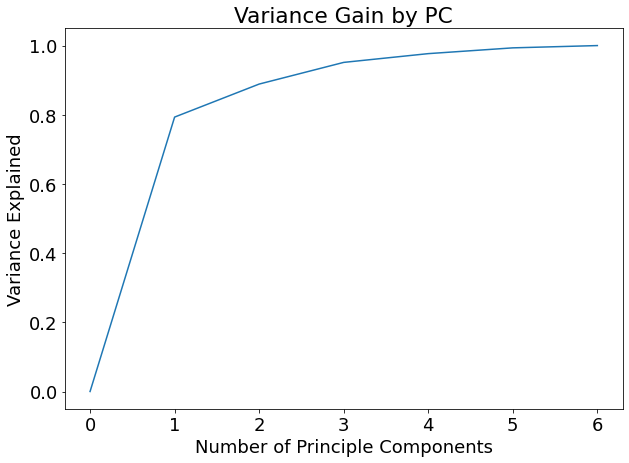

In [ ]:
# 7. Plotting the results onto a line graph, allowing us to observe 'The elbow'
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18  # makes lable size bigger
plt.rcParams['figure.figsize'] = (10, 7)

cumvar=np.cumsum(explained_variance)
cumvar = np.insert(cumvar, 0,0)

plt.plot(([0,1,2,3,4,5,6]),cumvar)
plt.title('Variance Gain by PC')
plt.xlabel('Number of Principle Components')
plt.ylabel('Variance Explained') 
plt.show()

#### From the numbers and the graph, it becomes clear that the first 3 PCs are sufficient to capture over 95% of the variance in the data!

- We often want to keep only the significant features and drop the insignificant ones. 
- A rule of thumb is to keep the top principal components that capture significant variance and ignore the small ones.

### Recall that in the previous class we were only able to either visualize hand-selected dimensions at a time or collapse all dimensions into a similarity matrix?

***Using PCA, we can plot the Dr. D's customers using the first 3 PCs!***

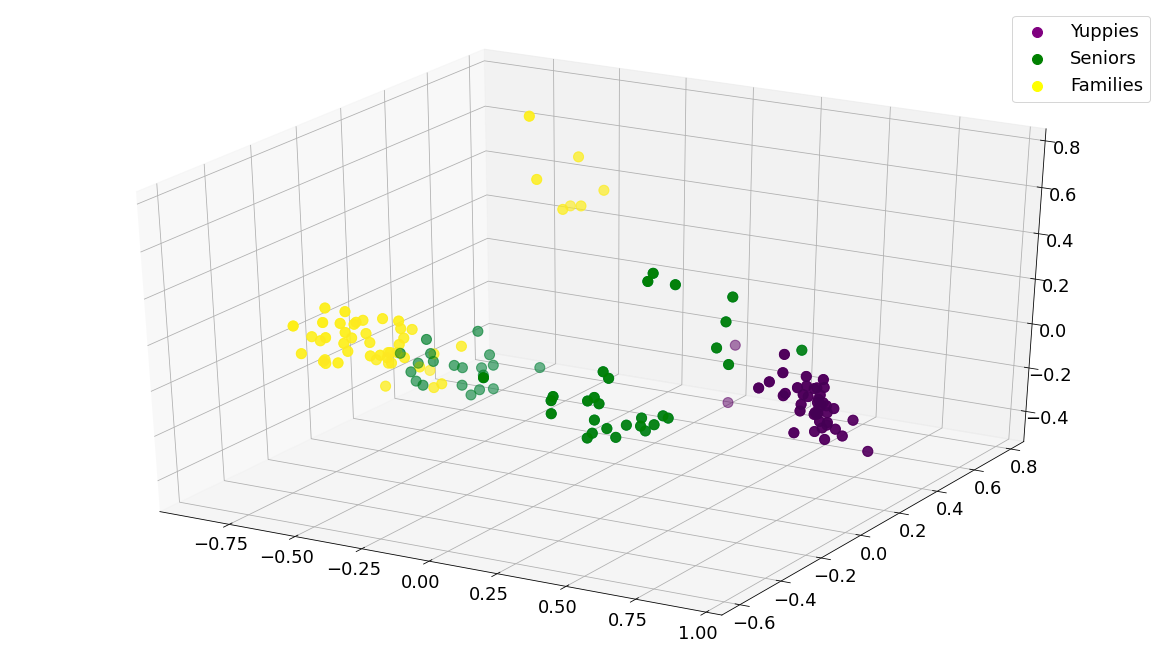

In [ ]:
# Import some libraries

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2. Create an array for the visualization from the dataframe (we also match PCs to Segments)
pcs=x_pca.values
pcs0 = pcs[segs==0]
pcs1 = pcs[segs==1]
pcs2 = pcs[segs==2]

# 3. Visualize the Output
plt.rcParams['font.size'] = 18  # makes lable size bigger
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pcs[:, 0], pcs[:, 1], pcs[:, 2], c=segs, s=100)

# 4. Add a legend
ax.scatter(pcs0[:, 0], pcs0[:, 1], pcs0[:, 2], c="Purple", s=100, label='Yuppies')
ax.scatter(pcs1[:, 0], pcs1[:, 1], pcs1[:, 2], c="Green", s=100, label='Seniors')
ax.scatter(pcs2[:, 0], pcs2[:, 1], pcs2[:, 2], c="Yellow", s=100, label='Families')
ax.legend()

# 3. t-distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE was developed by Laurens van der Maaten and Geoggrey Hinton (http://www.cs.toronto.edu/~hinton/absps/tsne.pdf).   

t-SNE is a machine learning algorithm for visualization that presents embeding high-dimensional data in a low-dimensional space of two or three dimensions.

**The authors (or inventors) of t-SNE describe it as follows:** 

*“t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding”.*



***What is the best way to present this three-dimensional pyramid in two-dimensions?***
![t-SNE](https://mapxp.app/BUSI488/tSNE-Clusters.jpg "t-SNE")

- A 3D pyramid with data point clusters at the corners. 
- If we just project the 3D graph to a 2D graph as in Panel (A), group A becomes the center cluster, appearing much closer to B-E. 
- Panel (B) is probably a better 2D visual representation because:
    - (B) better preserves far distances between A and other clusters, at the cost of some distortion of distances between clusters B, C, D, and E. 
    - Both (A) and (B) preserve the local distances of points in each cluster, and both preserve the far distances between clusters C-E, B-D.
    - Both (A) and (B) change the relative positions among the clusters, which they must do in going from 3d to 2d. With different initial parameters (B) could have pushed cluster A between any consecutive pair in the ring B-C-D-E. 


***What is the best way to present this three-dimensional Swiss roll as two-dimensional?***
![Swiss Roll](https://mapxp.app/BUSI488/SwissRoll.jpg "Swiss Roll")

- Intuitively we want to “unroll” the Swiss roll to a flat sheet. 
- In the mathematics of t-SNE, similar datapoints will try to plot as nearby points and dissimilar datapoints will try (more weakly) to become distant points.
- Beware: don't infer anything from the positions of distant groups of points! 

    
t-SNE, a nonlinear dimension reduction technique, is ***designed to preserve the local neighborhoods***.   

*If a set of points cluster together on a t-SNE plot, we can be fairly certain that these points are close to each other.*

## 3.1 t-SNE models Similarities among Points

How does t-SNE define similarities to a datapoint $X_i$? 

1. t-SNE's begins by calculating Euclidean distances between all pairs of data points, normalized by standard deviation. 
2. By taking $\exp(- \|X_i,X_j\|_2)$ this becomes a similarity between 0 and 1, with identical points giving similarity 1. 
3. By normalizing by the sum of the similarities for $k\ne i$, this can be interpretted as the conditional probability $p_{j|i}$ that point i would pick point j as neighbor in a Normal distribution. 

Here is the formula; closer points have higher probability.

![t-SNE Similarity](https://mapxp.app/BUSI488/EQ-TSNE-1.jpg "t-SNE Similarity")


##3.2 t-SNE projects Similarities onto a 2D or 3D Space (i.e., Map)

t-SNE aims to match the above conditional probability p between j and i as well as possible by a low-dimensional space measure q between corresponding plotted points $Y_i$ and $Y_j$, as shown below. 

![t-SNE Projection](https://mapxp.app/BUSI488/EQ-TSNE-2.jpg "t-SNE Projection")

***The probability q follows a fat-tailed Student-t distribution, thus the “t” in t-SNE comes from.***

The next step is to find $Y_i$ such that the distribution q will be as close to the distribution p as possible.  
- t-SNE uses stochastic gradient decent, an optimization technique, to find the values.

##3.3 Hyperparamters of t-SNE

t-SNE has a number of hyperparameters that can significantly affect its output!

#### Let's play with some of these hyperparameters on the following website:

https://distill.pub/2016/misread-tsne/


##3.4 Let's use t-SNE to visualize the similarities among Dr. D's Amazin' Grocery Store's Customers

[t-SNE] Computing 143 nearest neighbors...
[t-SNE] Indexed 144 samples in 0.000s...
[t-SNE] Computed neighbors for 144 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 144 / 144
[t-SNE] Mean sigma: 0.343792
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.554810
[t-SNE] KL divergence after 1000 iterations: 0.046955


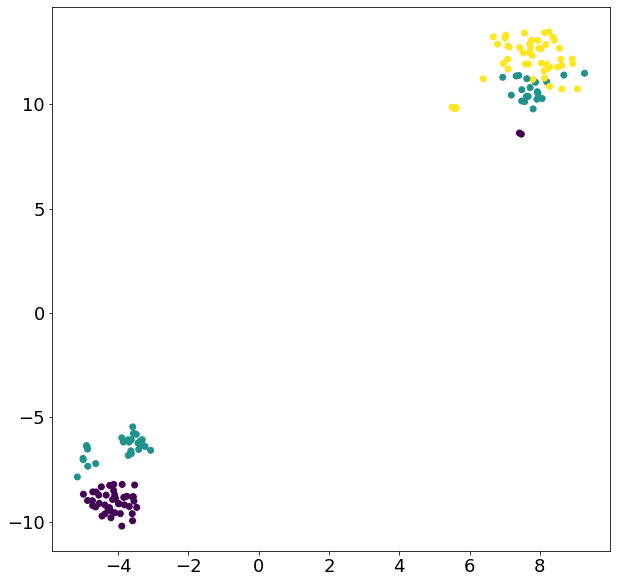

In [ ]:
# 1. Import t-SNE
from sklearn.manifold import TSNE

# 2. Instatitate and fit t-SNE
X_tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, init='random', learning_rate=200, random_state=42).fit_transform(X_scaled)

# 3. Visualize the Output
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=segs)

#### We can also run t-SNE for 3 Dimensions

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 144 samples in 0.000s...
[t-SNE] Computed neighbors for 144 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 144 / 144
[t-SNE] Mean sigma: 0.200103
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.639122
[t-SNE] KL divergence after 1000 iterations: 1.539091


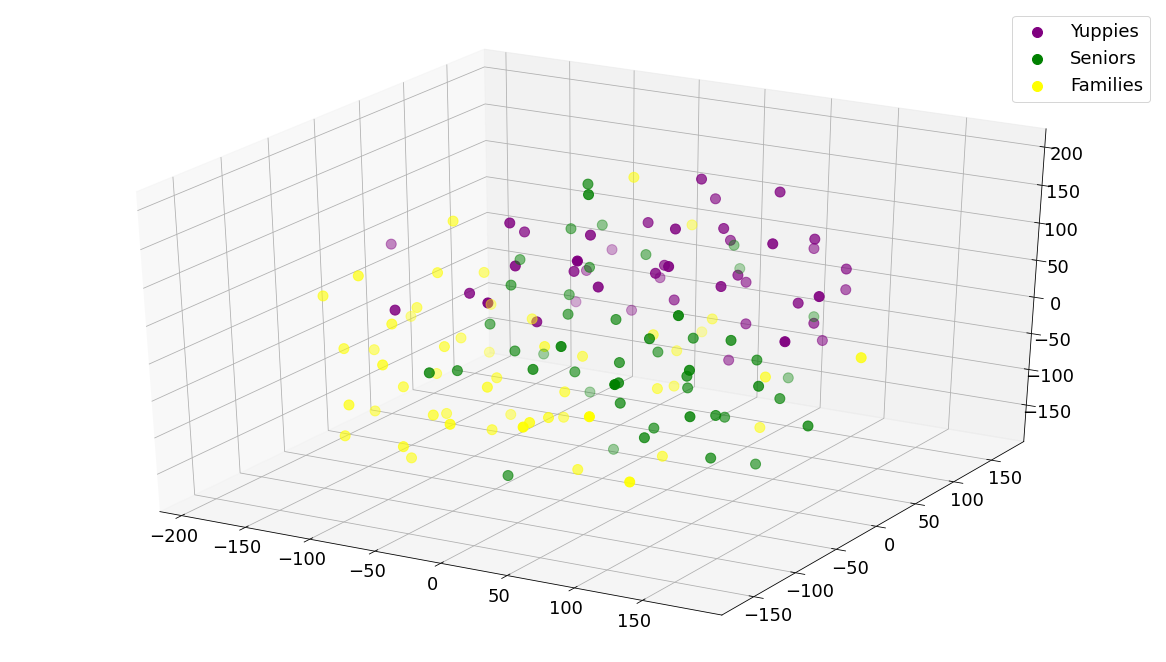

In [ ]:
# 1. Import libraries for 3D Map
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2. Instantiate and fit t-SNE for 3D
X_tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000, learning_rate=200,init='random', random_state=42).fit_transform(X_scaled)

# 3. Match Segments to Coordinates
X_tsne0 = X_tsne[segs==0]
X_tsne1 = X_tsne[segs==1]
X_tsne2 = X_tsne[segs==2]

# 4. Visualize the Output
plt.rcParams['font.size'] = 18  # makes lable size bigger
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2])
ax = Axes3D(fig)

ax.scatter(X_tsne0[:, 0], X_tsne0[:, 1], X_tsne0[:, 2], c="Purple", s=100, label="Yuppies")
ax.scatter(X_tsne1[:, 0], X_tsne1[:, 1], X_tsne1[:, 2], c="Green", s=100, label="Seniors")
ax.scatter(X_tsne2[:, 0], X_tsne2[:, 1], X_tsne2[:, 2], c="Yellow", s=100, label="Families")
ax.legend()

## 3.5 Combining PCA and t-SNE

Sometimes it makes sense to combine dimensionality reduction algorithms.   
We can use PCA to pre-process the data (down to 3 out of 6 PCs) and then use t-SNE to visualizes

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 144 samples in 0.000s...
[t-SNE] Computed neighbors for 144 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 144 / 144
[t-SNE] Mean sigma: 0.095254
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.064728
[t-SNE] KL divergence after 1000 iterations: 0.047430


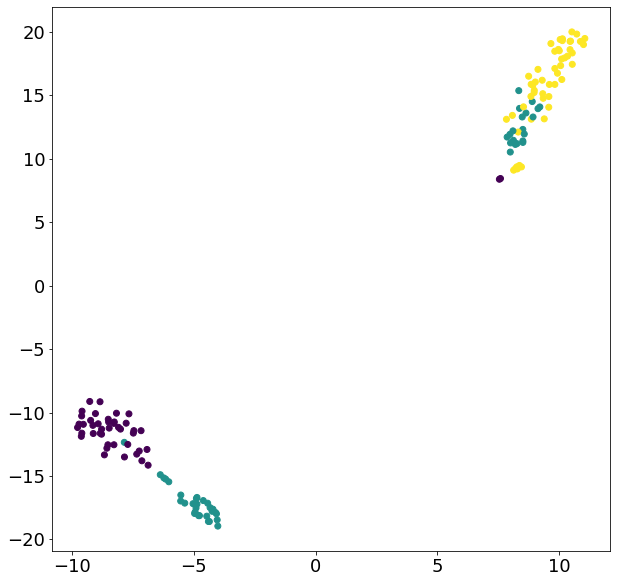

In [ ]:
# 1. Import PCA
from sklearn.decomposition import PCA

# 2. Instantiate the PCA model
pca = PCA()

# 3. Fit the PCA model
x_pca = pca.fit_transform(X_scaled)

# 4. Import t-SNE
from sklearn.manifold import TSNE

# 5. Instatitate and fit t-SNE to first 3 principle components
X_tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200, init='random', random_state=42).fit_transform(x_pca[:, 0:2])

# 6. Visualize the Output
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=segs)

## 3.6 t-SNE with Distance Matrices

Sometimes, you might already have a distance matrix. 

**Problem?** 
- t-SNE operates on feature vectors. 
- We have a distance matrix.

**Solution!** 
- Internally, t-SNE finds distances between the input feature vectors
- We can ***tell t-SNE that we already have distances***
- Must specify additional ***hyperparameter***: *metric = 'precomputed'*

--> You can still use t-SNE's second part (map projection) to create 2D or 3D maps.

(144, 144) 

Minimum Distance: 0.0
Maximum Distance: 1.903872937744566 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 144 samples in 0.000s...
[t-SNE] Computed neighbors for 144 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 144 / 144
[t-SNE] Mean sigma: 0.200103
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.060341
[t-SNE] KL divergence after 1000 iterations: 0.115156


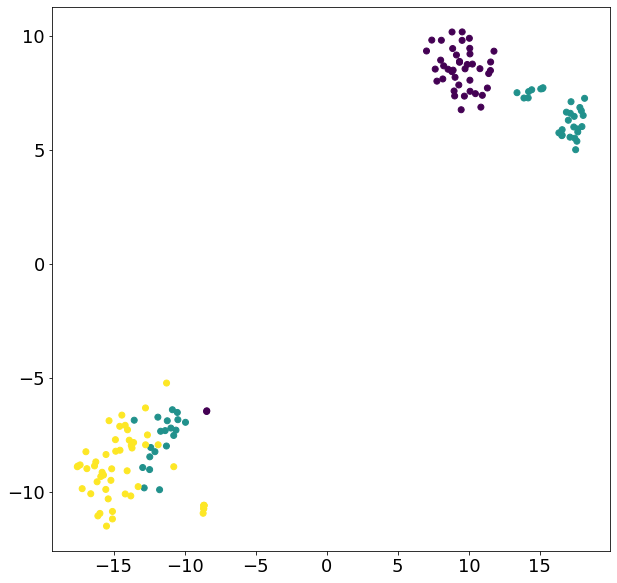

In [ ]:
# Step 1: Calculate pairwise Euclidean distances between all of Dr. D's customers based on their (scaled) features
from sklearn.metrics import pairwise_distances
matrix = pairwise_distances(X_scaled, metric="euclidean")

# Step 2: Check that we get 144 x 144 distance matrix (for 144 customers)
print(matrix.shape,'\n')

# Step 4: Check Minimum and maximum values
print('Minimum Distance:',matrix.min())
print('Maximum Distance:', matrix.max(),'\n')

# Step 4: Apply t-SNE to the distance matrix
# Import t-SNE
from sklearn.manifold import TSNE
# Instatitate and fit t-SNE
X_tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200, metric='precomputed', square_distances=True, init='random', random_state=42).fit_transform(matrix)

# Step 5: Visualize the Output of t-SNE
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=segs)


# **Looking Ahead:**  

####**Next Class:** Tuesday, February 7, 2022

#### ***Business Applications:*** *Shopping Basket Analysis*

#### **Reading** before class:
Gabel, S., Guhl, D. and Klapper, D., 2019. [P2V-MAP: mapping market structures for large retail assortments](https://journals.sagepub.com/doi/full/10.1177/0022243719833631). Journal of Marketing Research, 56(4), pp.557-580.
*You can find also find the article on Canvas*

#### **DataCamp Homework 4** Due:

Course 1 (Chapters 1-3): *Analyzing Marketing Campaigns with Pandas:*

- Pandas (850 XP)
- Exploratory Analysis & Summary Statistics (1400 XP)
- Conversion Attribution (1400 XP)

Course 2 (Chapters 1-2): *Cleaning Data in Python:*

- Common data problems (900 XP)
- Text and categorical data problems (850 XP)

This notebooks is inspired by the following great tutorials:

https://towardsdatascience.com/dimension-reduction-techniques-with-python-f36ca7009e5c
https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e

